## Data Preprocessing Examples

 In this task, we will work on handling missing data as well as data standardisation and normalisation. Data can have missing values for a number of reasons, such as observations that were not collected or data corruption. We will discuss some general considerations for missing data, discuss how pandas chooses to represent it, and demonstrate some built-in pandas tools for handling missing data in Python. 


In [2]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

# Scaling modules
from mlxtend.preprocessing import minmax_scaling, standardize

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Ensures the same random data is used each time you execute the code
np.random.seed(0) 


In [4]:
# Read in data 
df = pd.read_csv('balance_missing.txt', delim_whitespace=True)

## Working with missing data
### Take a first look at the data
This should always be the first step during any analysis. Depending on data sources, missing data are identified differently. Pandas identifies missing values as NaN. However, missing values can appear as a question mark (?) or a zero (0) or minus one (-1) or a blank. So it is important to view and understand your data before anything else.

We are going to use the dataset `balance_missing.txt`. From the first five observations, we can see there are several missing values. They have been represented as NaN.

In [5]:
# Explore data
df.shape

(400, 11)

In [6]:
df.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.5304088790893,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


How many NaN values can you point out?

Now that we have seen that there are missing values, we need to get a sense of how many missing values exist in the whole dataset. We are going to find how many missing values we have in each column.


In [7]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()

# Look at the number of missing points in the first ten columns
missing_values_count[0:10]

Balance       0
Income        6
Limit        15
Rating       11
Cards         1
Age          10
Education     6
Gender        8
Student       7
Married       3
dtype: int64

To better understand how much data is missing, we can calculate the percentage of all the missing values. If we get a very high percentage, we may be unable to use the data.


In [8]:
# Total number of missing values
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# Percent of data that is missing
(total_missing/total_cells) * 100


1.7727272727272727

Only 1.77% of the values are missing. 

### Drop missing values

One option to deal with missing values is to remove any rows or columns that contain missing values. This strategy is not recommended for datasets with important data, sensitive data, or few observations. It's usually worth taking the time to go through your data and interrogate all the columns with missing values to get a proper understanding of your dataset.

If you're sure you want to drop rows with missing values, pandas has a handy function, `dropna()` to do this. Let's try it out on our data.

In [9]:
# Create a temporary dataframe
temp_df = df

# Remove all the rows that contain a missing value.
temp_df.dropna().head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.4861776123913,80.18,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.5745164367595,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.5762043512884,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.93809029500252,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian


As you can see, there are no longer NaN values in the first five observations as these have been dropped from the DataFrame. In fact, all observations with a NaN value in any of the columns have been dropped. Below you can see the number of rows has been reduced to 331 compared to 400 in the original dataset.

In [10]:
temp_df.dropna().shape

(331, 11)

The above procedure removed observations. Now let us look at removing columns.

In [11]:
# Create a temporary dataframe
temp_df = df

# Remove all columns with at least one missing value
columns_with_na_dropped = temp_df.dropna(axis=1)
columns_with_na_dropped.head()

,Balance
0,12.2407984760474
1,23.2833339223376
2,22.5304088790893
3,27.652810710665
4,16.8939784904888


Looks like all the columns had at least one missing value except the "Balance" column. Losing all columns but one reduces the amount of data you have drastically. This is one of the reasons why removing observations or columns with missing data may not be a good solution. We'll explore other options next.

### Filling in missing values automatically

We can use the pandas `fillna()` function to fill in missing values in a dataframe. One option is to specify what we want the NaN values to be replaced with. Here, we can replace all NaN with 0. 

In [12]:
# Create a temporary dataframe
temp_df = df

# replace all NA's with 0
temp_df.fillna(0).head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,0.0,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,0,6645,483.0,3.0,82.0,15.0,Female,0,Yes,Asian
2,22.5304088790893,104.593,7075,0.0,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,0,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


Another option is to replace the missing values with the values that come just before or just after it in the same column. This can be used in datasets where the observations are in some sorted or logical order.

In [13]:
# Create a temporary dataframe
temp_df = df

# Replace all NaN's with the value that comes directly after it in the same column, 
# then replace all the remaining NaN's with 0
temp_df.fillna(method = 'bfill', axis=0).fillna(0).head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,82.0,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,104.593,6645,483.0,3.0,82.0,15.0,Female,No,Yes,Asian
2,22.5304088790893,104.593,7075,681.0,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,Male,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


### Feature Scaling Recap
Recall feature scaling is the process of restricting the values in a particular feature to ensure that all features lie on the same scale. There are two main types of feature scaling: standardisation and normalisation.

#### Standardisation vs. Normalisation: What's the difference?
One of the reasons that it's easy to get confused between standardisation and normalisation is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in standardisation, you're changing the range of your data to have a mean of 0 and a standard deviation of 1, while in normalisation you're changing the range of your data to have a maximum of 1 and a minimum of 0. 

#### Standarisation example

Text(0.5, 1.0, 'Scaled data')

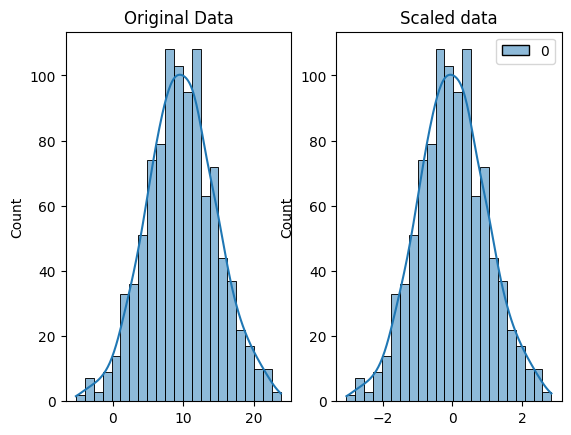

In [14]:
# Generate 1000 data points randomly drawn from an normal distribution
original_data = np.random.normal(loc=10, scale=5, size = 1000)

# Use minmax to standardise the data
scaled_data = standardize(original_data, columns = [0])

# Plot the orginal and scaled data to compare
fig, ax=plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0],kde=True)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1],kde=True)
ax[1].set_title("Scaled data")

Notice that the standardised data has a mean of 0.

#### Normalisation example

Text(0.5, 1.0, 'Scaled data')

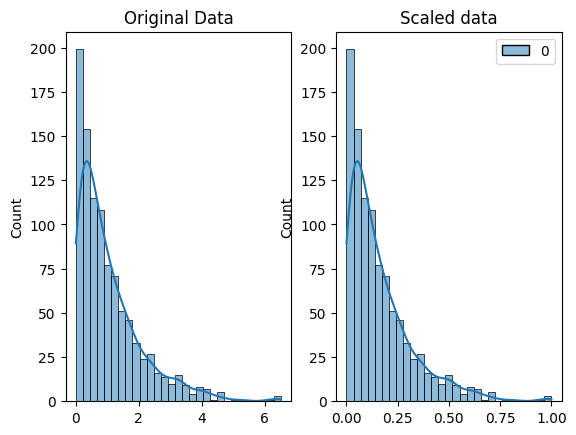

In [15]:
# Generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# Use minmax to normalise the data 
scaled_data = minmax_scaling(original_data, columns = [0])

# Plot the orginal and scaled data to compare
fig, ax=plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0],kde=True)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1],kde=True)
ax[1].set_title("Scaled data")

Notice that, instead of ranging from 0 to ~8, it now ranges from 0 to 1.

## Practice  

Practice handing missing data with the "countries.csv" dataset which is derived from some World Bank data. Each column is a type of indicator for example EN.ATM.CO2E.PC is carbon dioxide emissions in metric tons per capita. These indicators are recorded for participating countries.

In [17]:
# Load countries data
countries = pd.read_csv("countries.csv")

countries.head()


,Country,Country Groups,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,FP.CPI.TOTL.ZG,IT.CEL.SETS.P2,IT.NET.USER.ZS,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,NY.GDP.PCAP.CD,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.URB.TOTL.IN.ZS
0,CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,53.038989,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
1,CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,43.747235,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
2,EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,27.095971,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
3,EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,27.370720,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
4,EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,29.112597,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


<AxesSubplot: xlabel='IT.CEL.SETS.P2', ylabel='Count'>

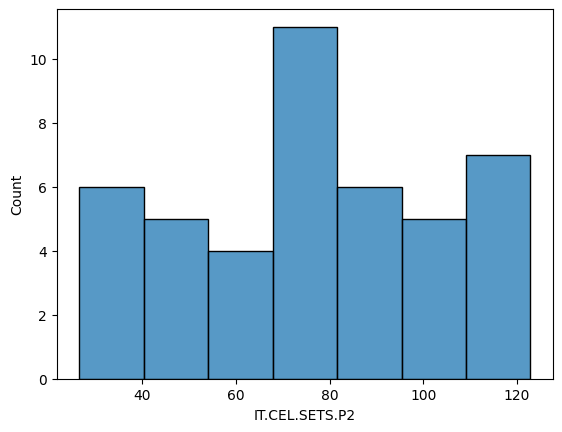

In [ ]:
# Visualise the IT.CEL.SETS.P2 feature. 
# IT.CEL.SETS.P2 is the mobile cellular subscriptions per 100 people.
sns.histplot(countries['IT.CEL.SETS.P2'])

In [18]:
# Scale the data using normalisation since the data does not have a Gaussian (normal) distribution. 
scaled_data = minmax_scaling(countries['IT.CEL.SETS.P2'], columns = [0])

## Compulsory Tasks


### Compulsory Task 1

In [20]:
# 1. Read in store_income_task.csv
store_income = pd.read_csv("store_income_data_task.csv")

# 2. Display the first 5 observations
store_income.head()

,id,store_name,store_email,department,income,date_measured,country
0,1,"Cullen/Frost Bankers, Inc.",NaN,Clothing,$54438554.24,4-2-2006,United States/
1,2,Nordson Corporation,NaN,Tools,$41744177.01,4-1-2006,Britain
2,3,"Stag Industrial, Inc.",NaN,Beauty,$36152340.34,12-9-2003,United States
3,4,FIRST REPUBLIC BANK,ecanadine3@fc2.com,Automotive,$8928350.04,8-5-2006,Britain/
4,5,Mercantile Bank Corporation,NaN,Baby,$33552742.32,21-1-1973,United Kingdom


In [31]:
# 3. Get the number of missing data points per column
missing_values_count = store_income.isnull().sum()
print(f"Missing data points per column: \n{missing_values_count}")


# 4. Identify the number of missing values in the first ten columns
print(f"\nNumber of missing values in the first ten columns: \n{missing_values_count[0:10]}")


Missing data points per column: 
id                 0
store_name         0
store_email      587
department        27
income             0
date_measured      0
country           35
dtype: int64

Number of missing values in the first ten columns: 
id                 0
store_name         0
store_email      587
department        27
income             0
date_measured      0
country           35
dtype: int64


5. Write a note on why you think we have missing data for the following three columns: store_email,  department, and country. Remember to classify them according to the three categories(types of missingness) we analysed in the task.

**Answer here:** Store email is Missing Completely at Random(MCAR). This means that the missing data is completely random and unrelated to any other variables. It is possible that the "store_email" field was not a mandatory or required field when the data was collected. If employees or stores had the option to provide their email addresses, some may have chosen not to do so, resulting in missing values. Department is Missing at Random(MAR). The data collection process may not have captured department information for all employees or stores. If the process was not designed to collect this information for every entry, we could have missing values. Country is Missing at Random(MAR). Human errors during data entry can result in missing country information. If the individuals responsible for inputting the data made mistakes or omitted the country information, it could lead to missing values.

### Compulsory Task 2

1. For the following example, decide whether standardisation or normalisation makes more sense. 

  a. You want to build a linear regression model to predict someone's grades, given how much time they spend on various activities during a typical school week.  You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying, while others study for four or more hours daily. Should you standardise or normalise this variable?  

  b. You're still working with your student's grades, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you standardise or normalise these variables?

**Answer here:**  

a. Normalise, since the time spent studying is not normally distributed.

b. Standardise. The two variables have different ranges, and standardising them will make it easier to compare their relative importance in the regression model.

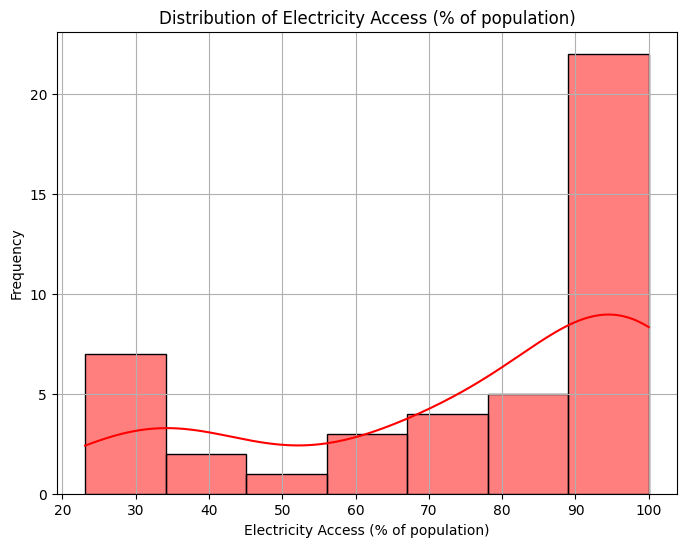

In [44]:
# 2. From the countries dataset, visualise the "EG.ELC.ACCS.ZS" column using a histogram.  
# Then, scale the column using the appropriate scaling method (normalisation or standardisaton).
# Finally, visualise the original and scaled data alongside each other. 
# Note EG.ELC.ACCS.ZS is the percentage of the population with access to electricity.

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
sns.histplot(countries['EG.ELC.ACCS.ZS'], color='red', kde=True, ax=ax)

# Add labels and a title
ax.set_title("Distribution of Electricity Access (% of population)")
ax.set_xlabel("Electricity Access (% of population)")
ax.set_ylabel("Frequency")

# Add grid lines
ax.grid(True)

# Show the plot
plt.show()

In [35]:
# Scale the data using normalisation since the data does not have a Gaussian distribution. 
norm_scaled_data = minmax_scaling(countries['EG.ELC.ACCS.ZS'], columns = [0])

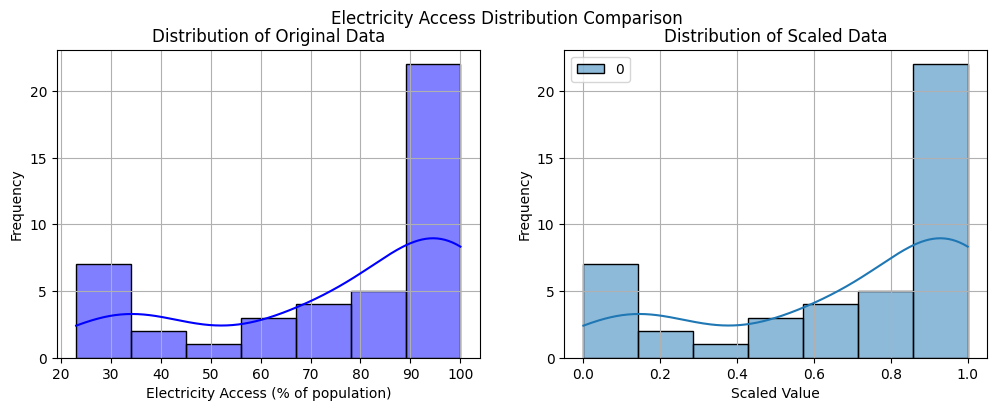

In [38]:
# Plot the orginal and scaled data alongside each other
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# The first subplot
sns.histplot(countries['EG.ELC.ACCS.ZS'], ax=ax[0], kde=True, color='blue')
ax[0].set_title("Distribution of Original Data")
ax[0].set_xlabel("Electricity Access (% of population)")
ax[0].set_ylabel("Frequency")
ax[0].grid(True)

# The second subplot
sns.histplot(norm_scaled_data, ax=ax[1], kde=True, color='salmon')
ax[1].set_title("Distribution of Scaled Data")
ax[1].set_xlabel("Scaled Value")
ax[1].set_ylabel("Frequency")
ax[1].grid(True)

# Title of the entire figure
fig.suptitle("Electricity Access Distribution Comparison")

# Show the plot
plt.show()
